# Import Libraries

In [6]:
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For better-looking plots

# Load the dataset
df = pd.read_csv("../data/raw/Chocolate Sales.csv")

# Display the first few rows
df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


# First Esxploration

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Get summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check the data types
print("\nData Types:")
print(df.dtypes)

missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)



Missing Values:
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

Summary Statistics:
       Boxes Shipped
count    1094.000000
mean      161.797989
std       121.544145
min         1.000000
25%        70.000000
50%       135.000000
75%       228.750000
max       709.000000

Data Types:
Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object
Missing values per column:
 Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


# Converting data types

In [8]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")  # Adjust if needed

# Check if the conversion was successful
print("\nUpdated Data Types:")
print(df.dtypes)


Updated Data Types:
Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                   object
Boxes Shipped             int64
dtype: object


# Sales Histograsm

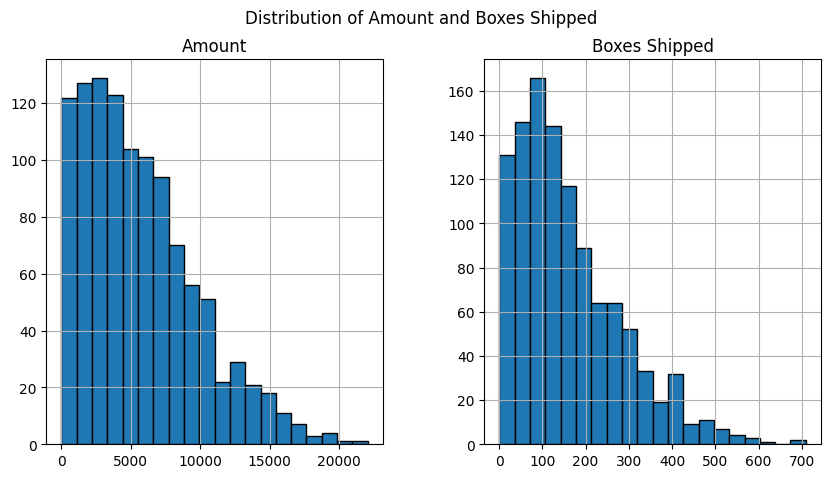

In [9]:
# Convert 'Amount' to numerical (removing "$" and converting to float)
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# Plot histograms
df[['Amount', 'Boxes Shipped']].hist(bins=20, figsize=(10, 5), edgecolor='black')

plt.suptitle("Distribution of Amount and Boxes Shipped")
plt.show()


# More Historgrams

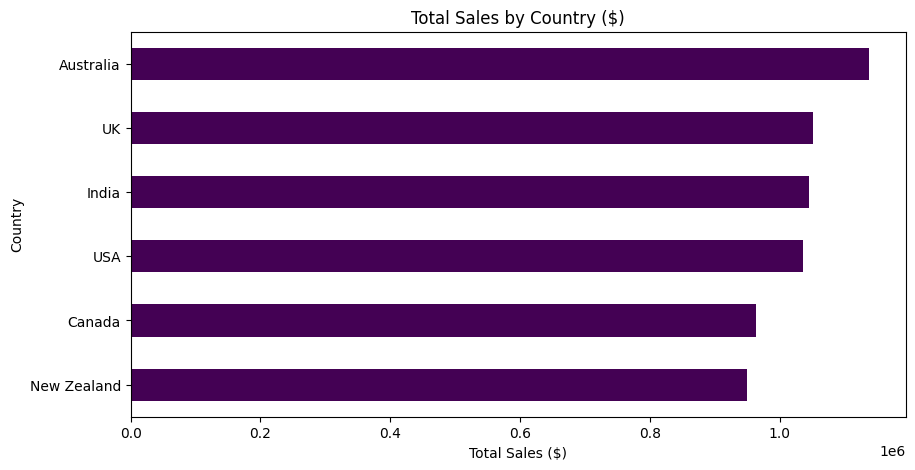

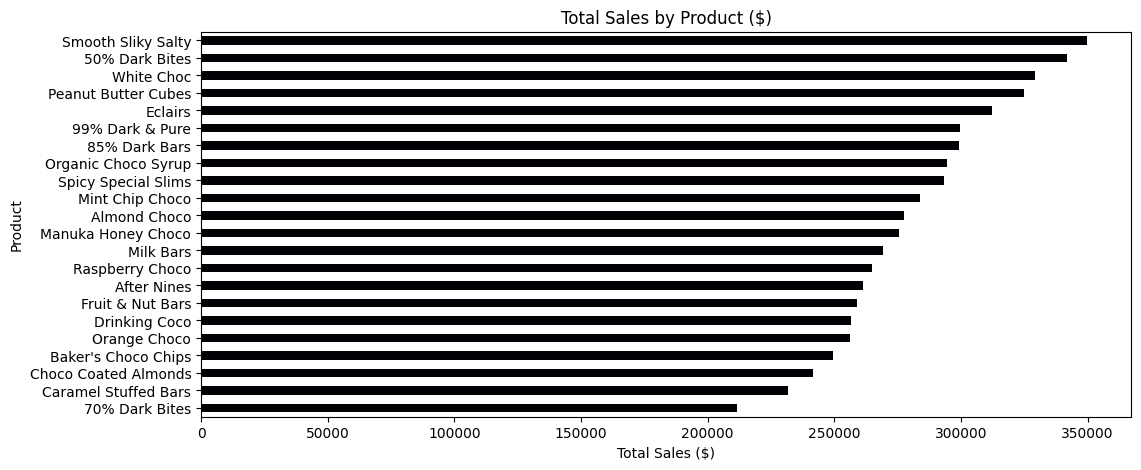

In [10]:

# Plot Sales Frequency by Country
plt.figure(figsize=(10, 5))
df.groupby('Country')['Amount'].sum().sort_values().plot(kind='barh', colormap="viridis")
plt.title("Total Sales by Country ($)")
plt.xlabel("Total Sales ($)")
plt.ylabel("Country")
plt.show()


# Plot Sales Frequency by Product
plt.figure(figsize=(12, 5))
df.groupby('Product')['Amount'].sum().sort_values().plot(kind='barh', colormap="magma")
plt.title("Total Sales by Product ($)")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product")
plt.show()

# Finding Unique values

In [11]:
# Display unique values in categorical columns
print("\nUnique Sales Persons:", df['Sales Person'].nunique())
print(df['Sales Person'].unique())

print("\nUnique Countries:", df['Country'].nunique())
print(df['Country'].unique())

print("\nUnique Products:", df['Product'].nunique())
print(df['Product'].unique())



Unique Sales Persons: 25
['Jehu Rudeforth' 'Van Tuxwell' 'Gigi Bohling' 'Jan Morforth' 'Oby Sorrel'
 'Gunar Cockshoot' 'Brien Boise' 'Rafaelita Blaksland' 'Barr Faughny'
 'Mallorie Waber' 'Karlen McCaffrey' "Marney O'Breen" 'Beverie Moffet'
 'Roddy Speechley' 'Curtice Advani' 'Husein Augar' 'Kaine Padly'
 'Dennison Crosswaite' "Wilone O'Kielt" 'Andria Kimpton' 'Kelci Walkden'
 'Camilla Castle' 'Madelene Upcott' 'Dotty Strutley' 'Ches Bonnell']

Unique Countries: 6
['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']

Unique Products: 22
['Mint Chip Choco' '85% Dark Bars' 'Peanut Butter Cubes'
 'Smooth Sliky Salty' '99% Dark & Pure' 'After Nines' '50% Dark Bites'
 'Orange Choco' 'Eclairs' 'Drinking Coco' 'Organic Choco Syrup'
 'Milk Bars' 'Spicy Special Slims' 'Fruit & Nut Bars' 'White Choc'
 'Manuka Honey Choco' 'Almond Choco' 'Raspberry Choco'
 'Choco Coated Almonds' "Baker's Choco Chips" 'Caramel Stuffed Bars'
 '70% Dark Bites']


# Agregate by Categories

In [12]:
# Total Sales by Country
sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
print("\nTotal Sales by Country:")
print(sales_by_country)

# Total Sales by Product
sales_by_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product:")
print(sales_by_product)


Total Sales by Country:
Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

Total Sales by Product:
Product
Smooth Sliky Salty      349692.0
50% Dark Bites          341712.0
White Choc              329147.0
Peanut Butter Cubes     324842.0
Eclairs                 312445.0
99% Dark & Pure         299796.0
85% Dark Bars           299229.0
Organic Choco Syrup     294700.0
Spicy Special Slims     293454.0
Mint Chip Choco         283969.0
Almond Choco            277536.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Raspberry Choco         264740.0
After Nines             261331.0
Fruit & Nut Bars        259147.0
Drinking Coco           256655.0
Orange Choco            256144.0
Baker's Choco Chips     249613.0
Choco Coated Almonds    241486.0
Caramel Stuffed Bars    231588.0
70% Dark Bites          211610.0
Name: Amount, dtype: float64


import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Sales Amounts")
plt.show()


# Sales Over Time

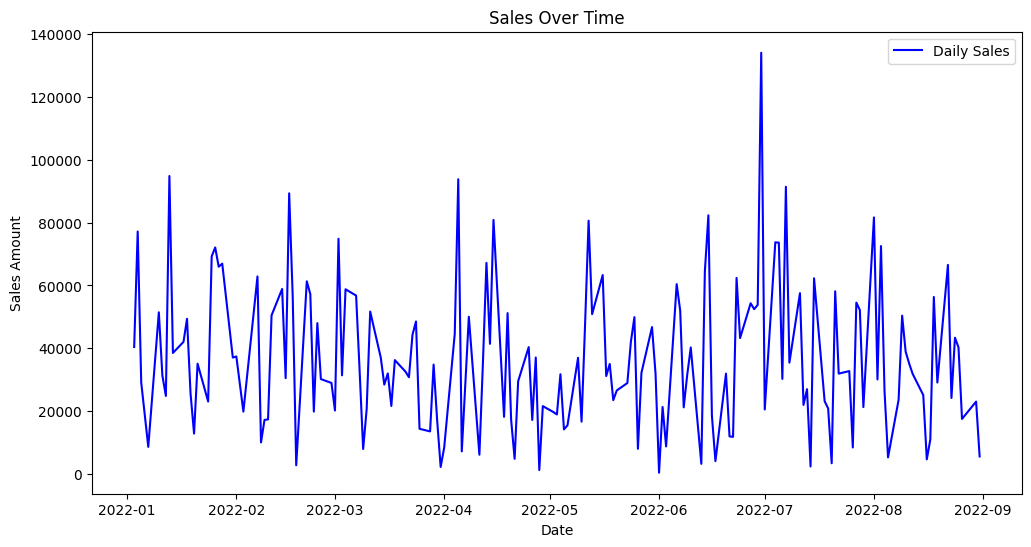

In [13]:
# Ensure date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales amount per day
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)  # Convert Amount to numeric
df_daily = df.groupby('Date')['Amount'].sum().reset_index()

# Plot time series
plt.figure(figsize=(12,6))
plt.plot(df_daily['Date'], df_daily['Amount'], label="Daily Sales", color="blue")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.legend()
plt.show()


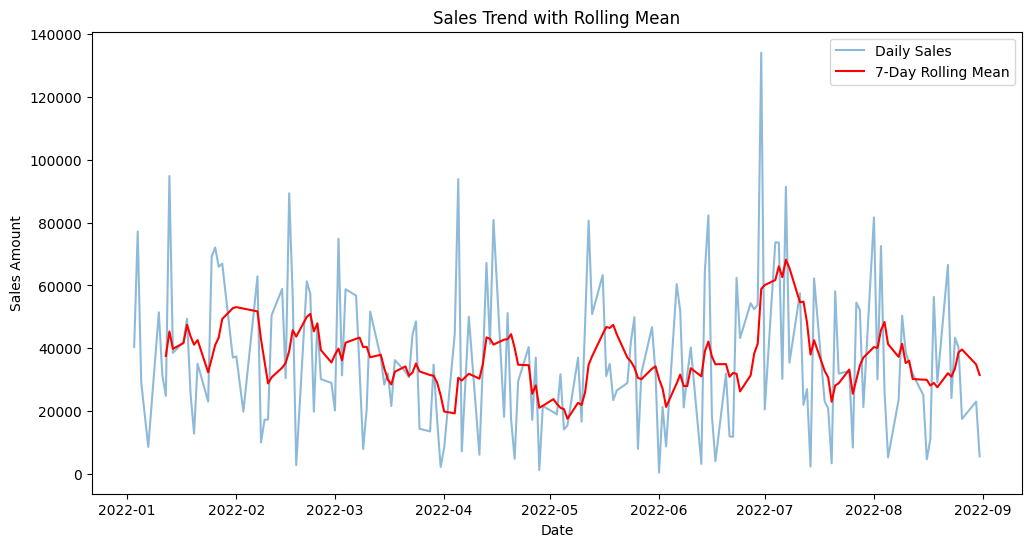

In [31]:
df_daily.set_index('Date', inplace=True)

# Compute a 7-day rolling average
df_daily['Rolling_Mean'] = df_daily['Amount'].rolling(window=7).mean()

# Plot original vs rolling mean
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily['Amount'], label="Daily Sales", alpha=0.5)
plt.plot(df_daily.index, df_daily['Rolling_Mean'], label="7-Day Rolling Mean", color="red")
plt.title("Sales Trend with Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.legend()
plt.show()


## 1 - Inspect features

In [17]:
df.describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


                 Amount  Boxes Shipped
Amount         1.000000      -0.018827
Boxes Shipped -0.018827       1.000000


/tmp/ipykernel_3849/4245730129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


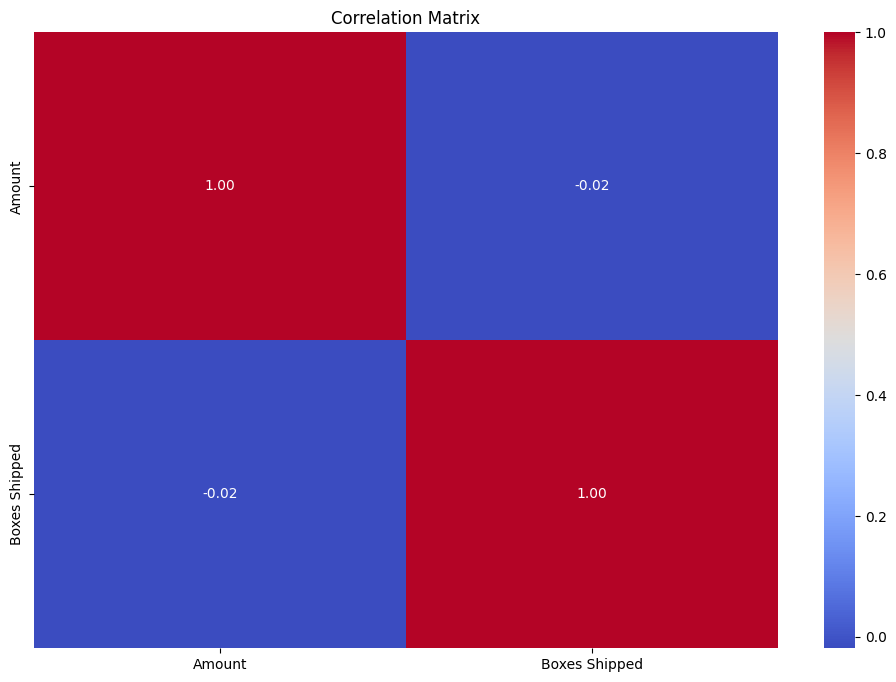

In [19]:
corr_matrix = df.corr()

# Print correlations with review_score
print(corr_matrix)

# Plot the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()